In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv("survey lung cancer.csv")

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [8]:
# check for unique values in all columns
columns = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

unique_values = []

for column in columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:{unique_values}")

Unique values for GENDER:['M' 'F']
Unique values for AGE:[69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
Unique values for SMOKING:[1 2]
Unique values for YELLOW_FINGERS:[2 1]
Unique values for ANXIETY:[2 1]
Unique values for PEER_PRESSURE:[1 2]
Unique values for CHRONIC DISEASE:[1 2]
Unique values for FATIGUE :[2 1]
Unique values for ALLERGY :[1 2]
Unique values for WHEEZING:[2 1]
Unique values for ALCOHOL CONSUMING:[2 1]
Unique values for COUGHING:[2 1]
Unique values for SHORTNESS OF BREATH:[2 1]
Unique values for SWALLOWING DIFFICULTY:[2 1]
Unique values for CHEST PAIN:[2 1]
Unique values for LUNG_CANCER:['YES' 'NO']


In [9]:
#let's replace 2,1 with 0,1 in the numeric columns for easier understanding
columns = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
for col in columns:
    df[col] = df[col].replace([1,2], [0,1])

In [10]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [11]:
df.isnull().mean()*100

GENDER                   0.0
AGE                      0.0
SMOKING                  0.0
YELLOW_FINGERS           0.0
ANXIETY                  0.0
PEER_PRESSURE            0.0
CHRONIC DISEASE          0.0
FATIGUE                  0.0
ALLERGY                  0.0
WHEEZING                 0.0
ALCOHOL CONSUMING        0.0
COUGHING                 0.0
SHORTNESS OF BREATH      0.0
SWALLOWING DIFFICULTY    0.0
CHEST PAIN               0.0
LUNG_CANCER              0.0
dtype: float64

### There is no missing values

In [12]:
Corrleation = df.corr()
Corrleation

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
CHRONIC DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640
ALCOHOL CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226


## Outliers

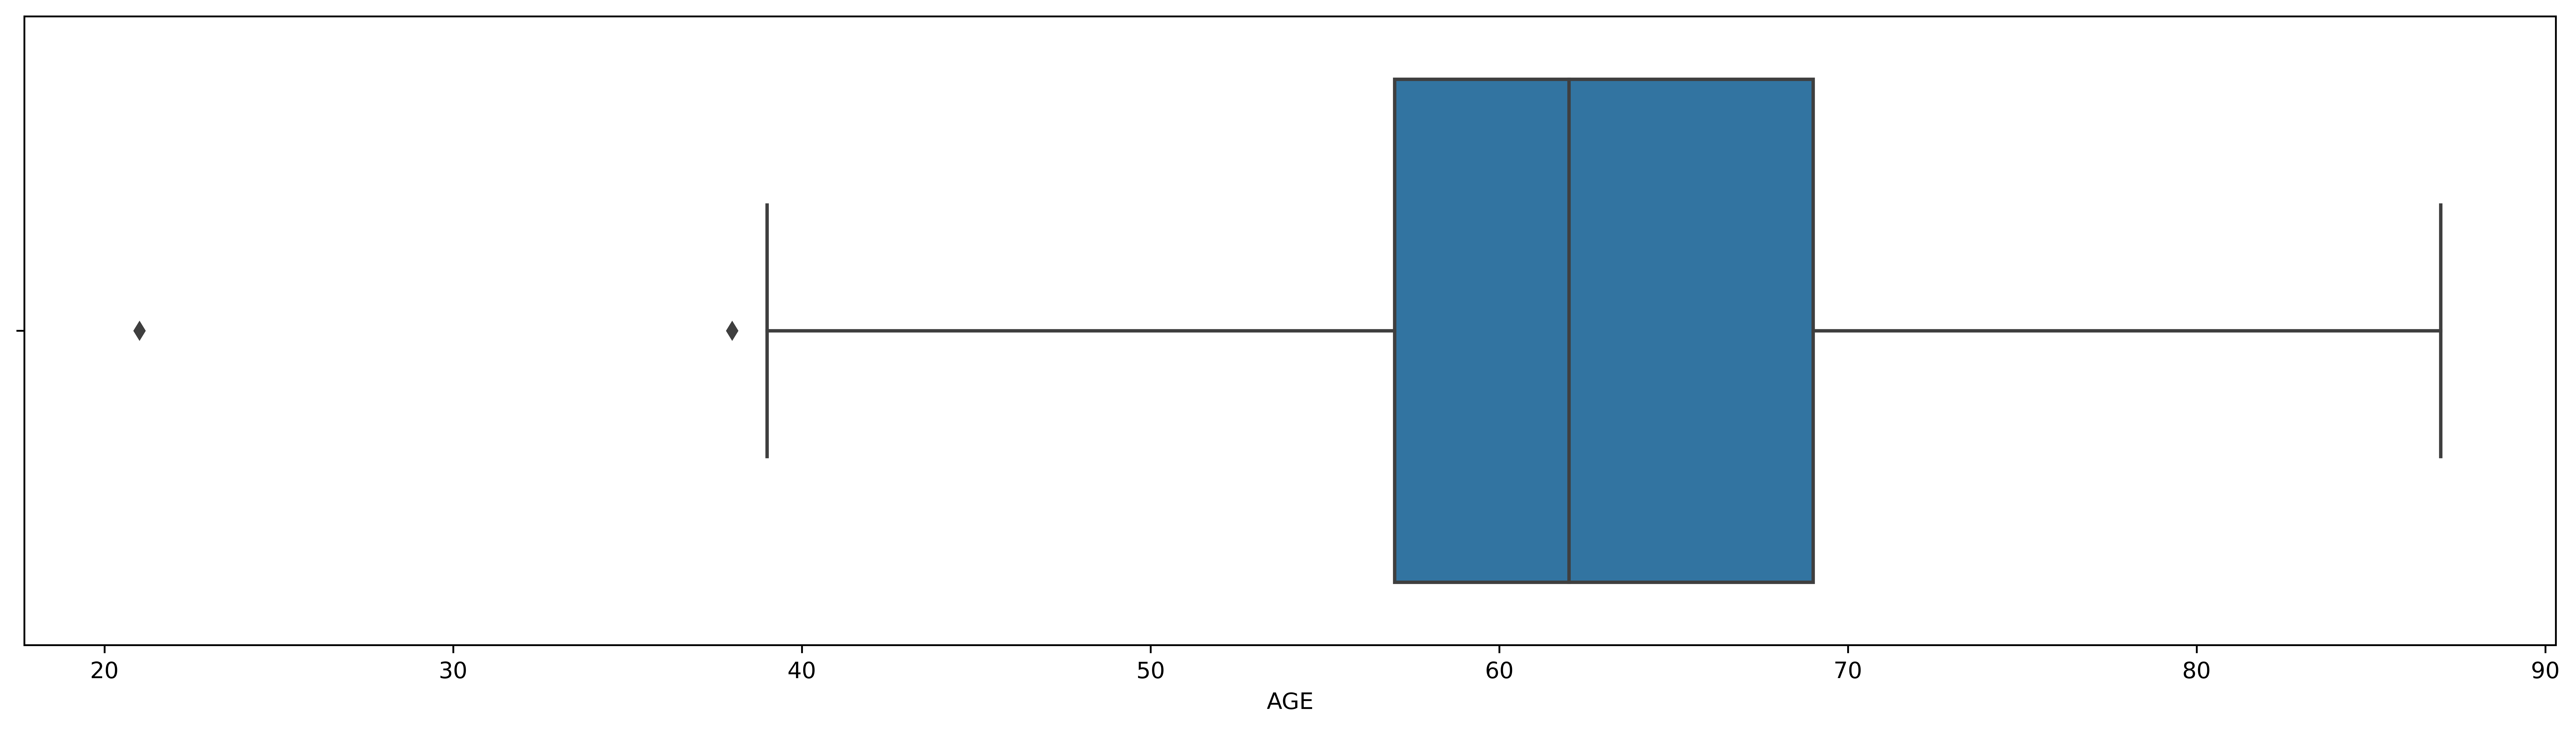

In [13]:
plt.figure(figsize=(20,5),dpi=800)
sns.boxplot(x='AGE',data=df)
plt.show()

In [14]:
df["AGE"].describe()

count    309.000000
mean      62.673139
std        8.210301
min       21.000000
25%       57.000000
50%       62.000000
75%       69.000000
max       87.000000
Name: AGE, dtype: float64

## Exploratory Data Analysis

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

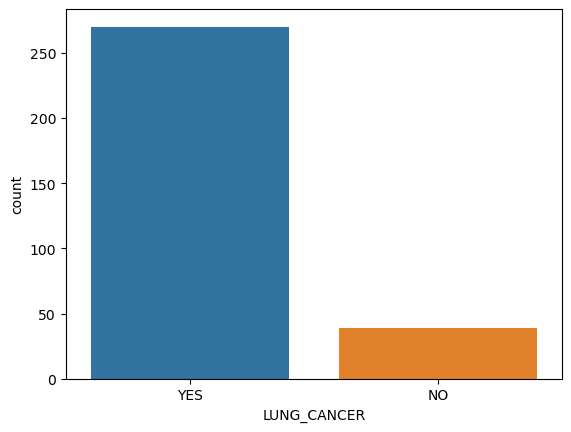

In [15]:
sns.countplot(data=df,x='LUNG_CANCER')

In [16]:
df['GENDER'].value_counts()

M    162
F    147
Name: GENDER, dtype: int64

<Axes: xlabel='GENDER', ylabel='count'>

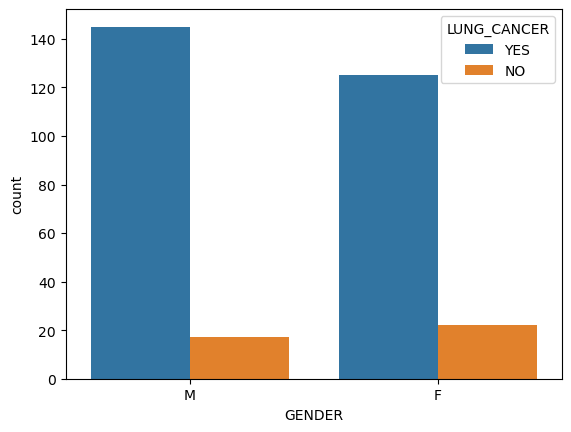

In [17]:
# risk of getting lung cancer related to gender
sns.countplot(data=df,x='GENDER',hue='LUNG_CANCER')

In [18]:
df['ALCOHOL CONSUMING'].value_counts()

1    172
0    137
Name: ALCOHOL CONSUMING, dtype: int64

<Axes: xlabel='ALCOHOL CONSUMING', ylabel='count'>

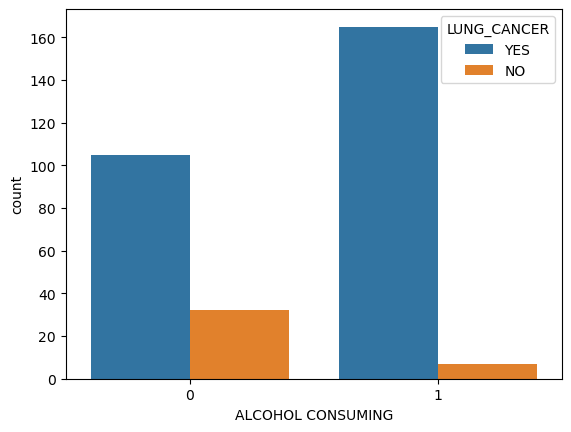

In [19]:
# risk of getting lung cancer related to Alchol_consumption
sns.countplot(data=df,x='ALCOHOL CONSUMING',hue='LUNG_CANCER')

<Axes: xlabel='AGE', ylabel='count'>

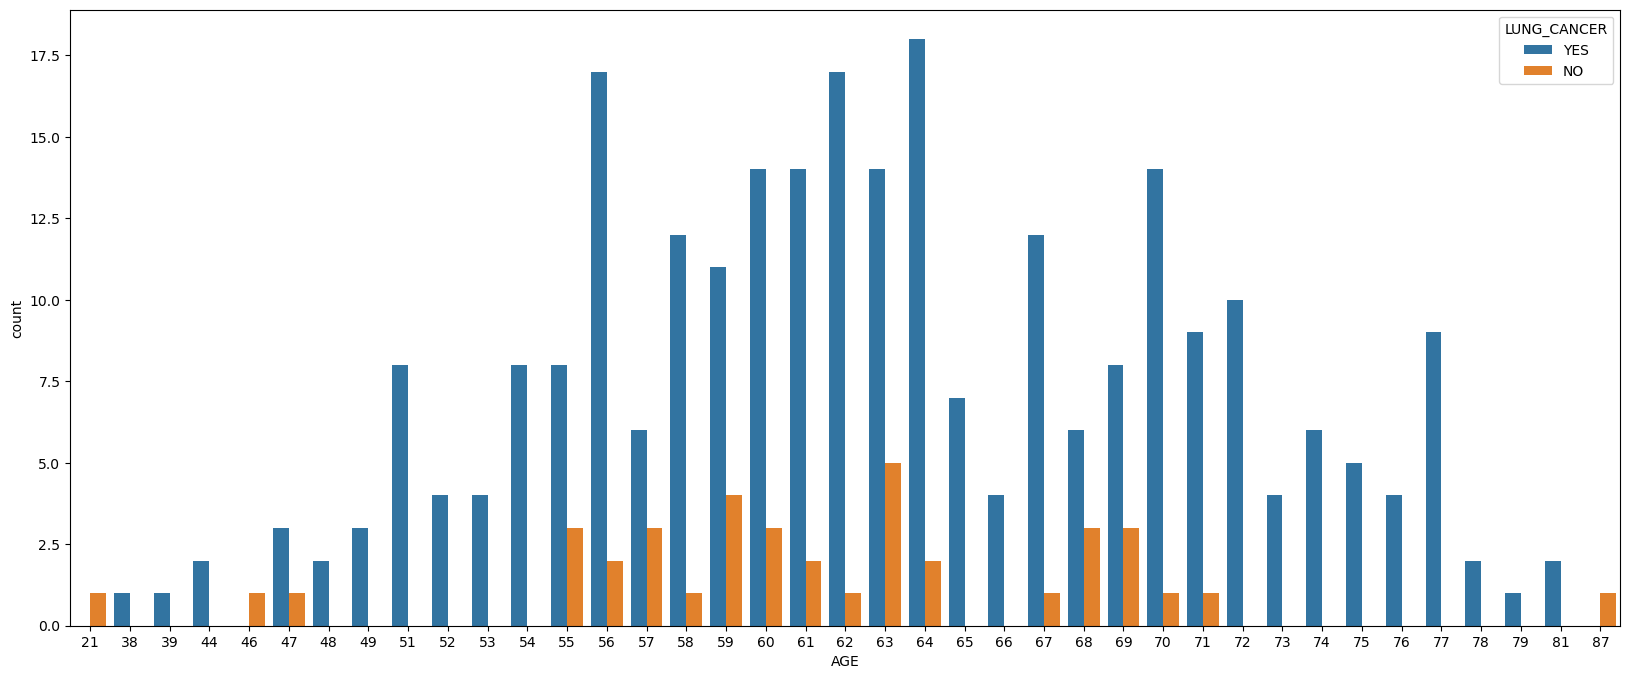

In [20]:
# Is there any relation between age and lung cancer
plt.figure(figsize=(20,8))
sns.countplot(data=df,x='AGE',hue='LUNG_CANCER')

In [21]:
#cut ages values into fewer categories
ranges=[0, 21, 40, 50, 60, 70, 87]
group_names = ["20's", "40's", "50's", "60's", "70's", "80's"]
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=ranges, labels=group_names)
df['AGE_GROUP'].unique()

['70's', '80's', '60's', '50's', '20's', '40's']
Categories (6, object): ['20's' < '40's' < '50's' < '60's' < '70's' < '80's']

In [22]:
Relation = df.groupby(["AGE_GROUP",'LUNG_CANCER'])
Relation.agg(Total=('LUNG_CANCER', 'count'))

Total
AGE_GROUP LUNG_CANCER       
20's      NO               1
          YES              0
40's      NO               0
          YES              2
50's      NO               2
          YES             10
60's      NO              16
          YES             92
70's      NO              18
          YES            114
80's      NO               2
          YES             52

<Axes: xlabel='AGE_GROUP', ylabel='count'>

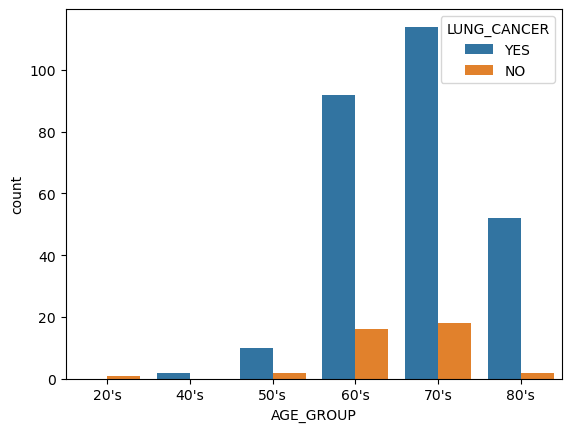

In [23]:
# Is there any relation between age and lung cancer
sns.countplot(data=df,x='AGE_GROUP',hue='LUNG_CANCER')

<Axes: xlabel='SMOKING', ylabel='count'>

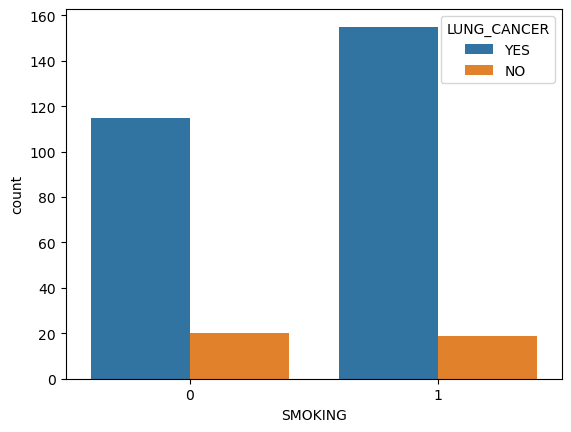

In [24]:
# Let's look at the relationship between Smoking and Lung cancer
sns.countplot(data=df,x='SMOKING',hue='LUNG_CANCER')

## Preprocessing

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   GENDER                 309 non-null    object  
 1   AGE                    309 non-null    int64   
 2   SMOKING                309 non-null    int64   
 3   YELLOW_FINGERS         309 non-null    int64   
 4   ANXIETY                309 non-null    int64   
 5   PEER_PRESSURE          309 non-null    int64   
 6   CHRONIC DISEASE        309 non-null    int64   
 7   FATIGUE                309 non-null    int64   
 8   ALLERGY                309 non-null    int64   
 9   WHEEZING               309 non-null    int64   
 10  ALCOHOL CONSUMING      309 non-null    int64   
 11  COUGHING               309 non-null    int64   
 12  SHORTNESS OF BREATH    309 non-null    int64   
 13  SWALLOWING DIFFICULTY  309 non-null    int64   
 14  CHEST PAIN             309 non-null    int

In [26]:
encoder = LabelEncoder()

columns = ['GENDER','AGE_GROUP','LUNG_CANCER']

for col in columns:
    df[col] = encoder.fit_transform(df[col])

In [27]:
df.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_GROUP
215,0,62,0,0,0,0,1,1,0,0,0,0,1,0,0,0,4
257,1,64,1,0,0,0,0,0,1,1,1,1,0,0,1,1,4
211,0,77,0,1,1,1,1,1,1,1,0,1,1,1,1,1,5
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1,3
53,1,49,1,0,0,1,1,1,1,1,1,1,1,1,1,1,2


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int32
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

## Building the Model

In [29]:
#create the feature variable
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

In [30]:
print(X.shape)
print(y.shape)

(309, 16)
(309,)


### Train test split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [32]:
y.value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

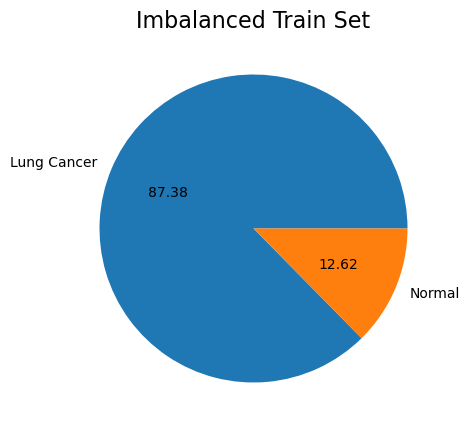

In [33]:
#visualize the imbalance in the train set
labels = ['Lung Cancer', 'Normal']
plt.figure(figsize=(5,5))
plt.pie(y.value_counts(), autopct='%.2f', labels=labels)
plt.title('Imbalanced Train Set', fontsize=16)
plt.show();

In [34]:
#instantiate and employ RandomUnderSampler to correct the imbalance
smote = SMOTE(sampling_strategy='auto',random_state=42)
smote_X_train, smote_y_train = smote.fit_resample(X_train, y_train)
smote_y_train.value_counts()

0    192
1    192
Name: LUNG_CANCER, dtype: int64

In [35]:
smote_y_train.value_counts()

0    192
1    192
Name: LUNG_CANCER, dtype: int64

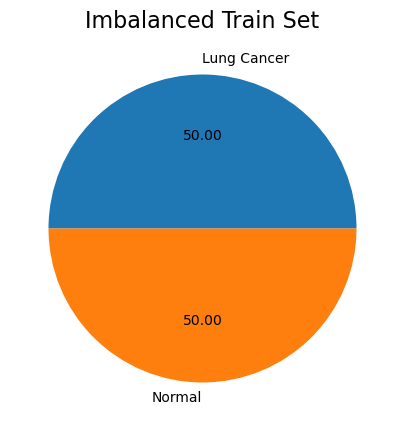

In [36]:
#visualize the imbalance in the train set
labels = ['Lung Cancer', 'Normal']
plt.figure(figsize=(5,5))
plt.pie(smote_y_train.value_counts(), autopct='%.2f', labels=labels)
plt.title('Imbalanced Train Set', fontsize=16)
plt.show();

### Hyperparameter Tuning For Classification Algorithms

#### Logistic Regression

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],              # Type of penalty
    'solver': ['lbfgs', 'liblinear']      # Solver algorithm
}

# Create a logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000)

# Create a GridSearchCV object
grid_search = GridSearchCV(logistic_regression_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(smote_X_train, smote_y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on your test data
accuracy_lr = best_model.score(X_test, y_test)

# Print the best hyperparameters and test accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy_lr)


Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy: 0.8817204301075269


#### K Nearest Neighbour

In [62]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(smote_X_train, smote_y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on your test data
accuracy_knn = best_model.score(X_test, y_test)

# Print the best hyperparameters and test accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy_knn)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Test Accuracy: 0.8924731182795699


#### Decision Tree

In [55]:
from sklearn.model_selection import GridSearchCV


# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum number of samples required at a leaf node
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

# Create a DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(decision_tree_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(smote_X_train, smote_y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on your test data
accuracy_dt = best_model.score(X_test, y_test)

# Print the best hyperparameters and test accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy_dt)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Test Accuracy: 0.8387096774193549


In [51]:
logistic_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

# Create a Voting Classifier with 'hard' voting by default
voting_classifier = VotingClassifier(estimators=[
    ('lr', logistic_reg),
    ('dt', decision_tree),
    ('knn', knn)
], voting='hard')  # You can change 'voting' to 'soft' for soft voting

# Fit the Voting Classifier on the training data
voting_classifier.fit(smote_X_train, smote_y_train)

# Make predictions on the test data
y_pred = voting_classifier.predict(X_test)

# Evaluate the accuracy of the Voting Classifier
accuracy_vc = accuracy_score(y_test, y_pred)
print("Voting Classifier Accuracy:", accuracy_vc)

Voting Classifier Accuracy: 0.8709677419354839


In [67]:
print("Decision Tree Classifier Accuracy:",accuracy_dt)
print("K Nearest Neighbour Accuracy:",accuracy_knn)
print("Logistic Regression Accuracy:",accuracy_lr)
print("Voting Classifier Accuracy:",accuracy_vc)

Decision Tree Classifier Accuracy: 0.8387096774193549
K Nearest Neighbour Accuracy: 0.8924731182795699
Logistic Regression Accuracy: 0.8817204301075269
Voting Classifier Accuracy: 0.8709677419354839
